In [1]:
#Сезон гриппа (или, точнее, вирусное заболевание, вызванное вирусами типа гриппа A, B или C)

In [2]:
#Из-за пандемии КОВИД в мире, у нас создается впечатление, что грипп больше не существует.
#Уже в начале эпидемии они сказали, что смертность от гриппа выше, чем смертность от ковида, но вскоре это оказалось неверным. 
#Мы изучим данные о зарегистрированном гриппе в Российской Федерации.
#Является ли число зараженных гриппом постоянным в течение года? Или власть, действительно, возникает периодически,/сезонное?
#Источник: https://apps.who.int/flumart/Default?ReportNo=12

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime as dt
import seaborn as sns

In [75]:
grip_rf = pd.read_csv('FluNetInteractiveReportRF.csv')

In [76]:
grip_rf.head(3)

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
0,Russian Federation,European Region of WHO,Eastern Europe,2017,1,02-01-17,08-01-17,4.0,1177,0.0,...,0.0,173,484,0.0,0.0,7.0,7.0,491,NaN,No Activity
1,Russian Federation,European Region of WHO,Eastern Europe,2017,2,09-01-17,15-01-17,31.0,4239,0.0,...,0.0,100,1385,0.0,0.0,50.0,50.0,1435,1.0,No Report
2,Russian Federation,European Region of WHO,Eastern Europe,2017,3,16-01-17,22-01-17,97.0,4451,0.0,...,0.0,43,1448,0.0,0.0,88.0,88.0,1536,1.0,No Report


In [77]:
grip_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            157 non-null    object 
 1   WHOREGION          157 non-null    object 
 2   FLUREGION          157 non-null    object 
 3   Year               157 non-null    int64  
 4   Week               157 non-null    int64  
 5   SDATE              157 non-null    object 
 6   EDATE              157 non-null    object 
 7   SPEC_RECEIVED_NB   155 non-null    float64
 8   SPEC_PROCESSED_NB  157 non-null    int64  
 9   AH1                156 non-null    float64
 10  AH1N12009          157 non-null    int64  
 11  AH3                157 non-null    int64  
 12  AH5                89 non-null     float64
 13  ANOTSUBTYPED       157 non-null    int64  
 14  INF_A              157 non-null    int64  
 15  BYAMAGATA          156 non-null    float64
 16  BVICTORIA          156 non

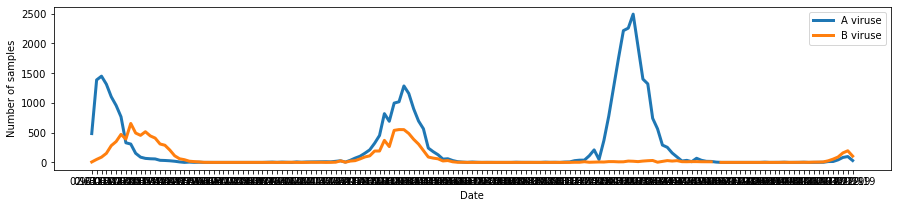

In [79]:
plt.figure(figsize=(15,3))
plt.plot(grip_rf['SDATE'], grip_rf['INF_A'], label='A viruse',linewidth=3)
#sns.lineplot(grip_rf['SDATE'], grip_rf['INF_A'], label='A viruse',linewidth=3)
plt.plot(grip_rf['SDATE'], grip_rf['INF_B'], label='B viruse',linewidth=3)
#sns.lineplot(grip_rf['SDATE'], grip_rf['INF_B'], label='B viruse',linewidth=3)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of samples')

plt.show()

In [ ]:
#Мы видим, что в некоторые периоды присутствуют оба типа вирусов, в которых когда-то доминировал вирус типа B (2018. лет),
#и когда-то значительно более распространенный тип A

Text(0, 0.5, 'Number of samples')

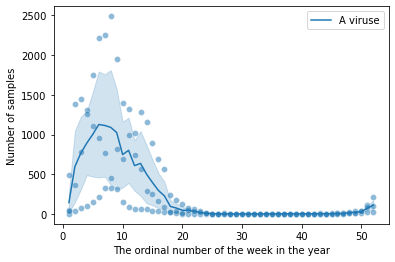

In [53]:
sns.lineplot(x='Week',y='INF_A',data=grip_rf,label='A viruse',ci=90)
sns.scatterplot(x='Week',y='INF_A',data=grip_rf,alpha =0.5)

plt.xlabel('The ordinal number of the week in the year')
plt.ylabel('Number of samples')

Text(0, 0.5, 'Number of samples')

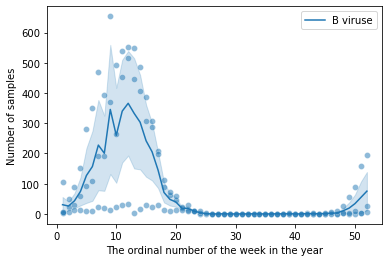

In [55]:
sns.lineplot(x='Week',y='INF_B',data=grip_rf,label='B viruse',ci=90)
sns.scatterplot(x='Week',y='INF_B',data=grip_rf,alpha =0.5)
plt.xlabel('The ordinal number of the week in the year')
plt.ylabel('Number of samples')

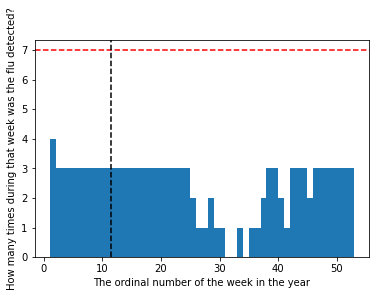

In [82]:
plt.hist(grip_rf[grip_rf['ALL_INF']>0]['Week'], bins=range(1,54))
plt.xlabel('The ordinal number of the week in the year')
plt.ylabel('How many times during that week was the flu detected?')
plt.axhline(y=7,color='red',linestyle='dashed')

plt.axvline(x=(31+28+21)/7,color='black',linestyle='dashed')

plt.show()

In [83]:
#давайте сравним с данными из Соединенных Штатов Америки

In [87]:
usadata = pd.read_csv('FluNetInteractiveReportUSA.csv')
usadata.head(3)

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
0,United States of America,Region of the Americas of WHO,North America,2017,1,02-01-17,08-01-17,38960,38960,0.0,...,NaN,4301,6421,60,47,405,512,6933,32027,No Report
1,United States of America,Region of the Americas of WHO,North America,2017,2,09-01-17,15-01-17,39546,39546,0.0,...,NaN,4965,7224,76,49,501,626,7850,31696,No Report
2,United States of America,Region of the Americas of WHO,North America,2017,3,16-01-17,22-01-17,41010,41010,0.0,...,NaN,6086,8396,104,69,681,854,9250,31760,No Report


<ipython-input-88-f25afd8b96d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  usadata.groupby(['SDATE'])['INF_A','INF_B'].sum().plot()


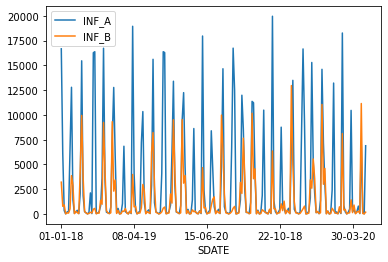

In [88]:
usadata.groupby(['SDATE'])['INF_A','INF_B'].sum().plot()
plt.show()

Text(0, 0.5, 'Number of samples')

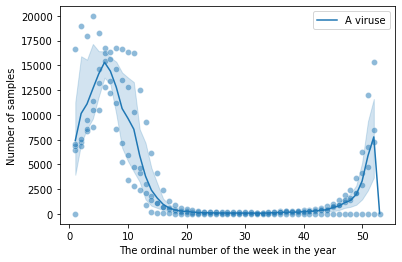

In [90]:
sns.lineplot(x='Week',y='INF_A',data=usadata,label='A viruse',ci=90)
sns.scatterplot(x='Week',y='INF_A',data=usadata,alpha =0.5)

plt.xlabel('The ordinal number of the week in the year')
plt.ylabel('Number of samples')

Text(0, 0.5, 'Number of samples')

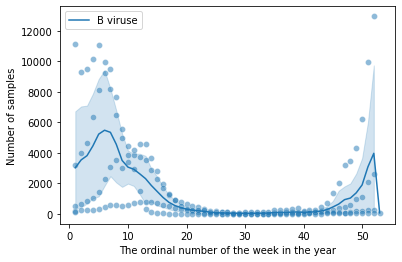

In [89]:
sns.lineplot(x='Week',y='INF_B',data=usadata,label='B viruse',ci=90)
sns.scatterplot(x='Week',y='INF_B',data=usadata,alpha =0.5)
plt.xlabel('The ordinal number of the week in the year')
plt.ylabel('Number of samples')

In [ ]:
#сравнивая российские и американские данные, мы можем видеть, что в Америке в большей степени присутствует вирус типа А,
#это является заметным и в случае вируса типа в